In [24]:
# Compare Kostis's lorentziator with my particle_tracer.py

import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

from myutils import restore, get_vlsvfile_fullpath
import numpy as np
import pytools as pt
import ftest as ft

R_E = 6.371e6
run = 'EGI'
#t_0 = 1000
t_0 = 1199


dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x11.5_y0.0_z0.0.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_TEST_0_electron_nt_200_x11.5_y0.0_z0.0.pickle")
#vlsv = ft.f('/wrk-vakka/users/horakons/carrington/data/particle_tracer/vlsv/E_0_-1_0_e-3_B_0_0_1_e-8.vlsv')
vlsv = ft.f(get_vlsvfile_fullpath('EGI', t_0))


nt = 200
dt = dct['t'][0][0][0] - dct['t'][0][0][1]#    -0.0005
t = t_0 + np.arange(nt+1) * dt
x = np.array(dct["x"])
v = np.array(dct["v"])


x_init = x[:,:,0,:]   # [8,8,3]
v_init = v[:,:,0,:]

nv = 8
# write initial conditions to a comma delimited .txt file 
f = open("/wrk-vakka/users/horakons/carrington/data/particle_tracer/input_trace_compare.txt", "w")
for i in range(nv):
    for j in range(nv):
        if (i == (nv-1)) & (j == (nv-1)):
            suffix = ""
        else:
            suffix = "\n"
        f.write("{},{},{},{},{},{}".format(x_init[i,j,0],x_init[i,j,1],x_init[i,j,2],
                                           v_init[i,j,0],v_init[i,j,1],v_init[i,j,2])+suffix)
f.close()

# then, before running lorentziator:
# cp /wrk-vakka/users/horakons/carrington/data/particle_tracer/input_trace_compare.txt /wrk-vakka/users/horakons/lorentziator/test_configs/input.txt

#For this run, the contents of ini_vlasiator_d.cfg should look like:
'''
[time]
time_end=1198.9
time_start=1199
tout=0.0005

[hardware]
type=CPU

[restart]
restart = 0

[Input]
file=1


 etc.

                                                                                                                                                                                                                                        
'''




Found population proton


'\n[time]\ntime_end=1198.9\ntime_start=1199\ntout=0.0005\n\n[hardware]\ntype=CPU\n\n[restart]\nrestart = 0\n\n[Input]\nfile=1\n\n\n etc.\n\n                                                                                                                                                                                                                                        \n'

In [25]:
# Read Lorentziator simulation data, from range of times

nv = 8 # 81
import ptrReader

xl = x*0
vl = v*0

start_ti = 0
end_ti = 200
for ti in range(start_ti, end_ti+1):
    print(ti)
    #p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9/population.{}.ptr'.format(str(ti).zfill(7)))
    p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9_x19RE/population.{}.ptr'.format(str(ti).zfill(7)))
    xl[:,:,ti,:] = p.pos().reshape([nv,nv,3])   # shape (nv^2, 3) -> (nv,nv,3)
    vl[:,:,ti,:] = p.vel().reshape([nv,nv,3])   # shape (nv^2, 3) -> (nv,nv,3)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [26]:
print(x[0,0,50,:])
print(xl[0,0,50,:])
x.shape; xl.shape   # agree pretty well!

[ 1.21045492e+08  3.36890529e+03 -2.49726118e+05]
[ 1.21048631e+08 -7.55920754e+03 -2.61497908e+05]


(8, 8, 201, 3)

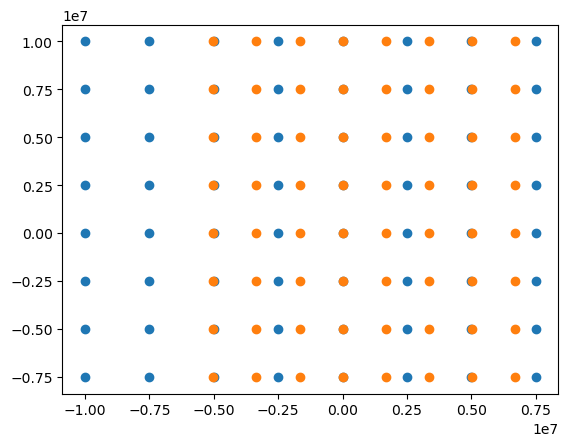

In [27]:
plt.scatter(vl[:,:,0,1], vl[:,:,0,2])   # in the magnetosheath, B~Bz, so particles mostly move in x-y plane
plt.scatter(vl[:,:,102,1], vl[:,:,102,2])

05-May-24 14:01:50: /proj/horakons/analysator/pyVlsv/vlsvreader.py:1297: UserWarning: Interpolation across refinement levels. Results are not accurate there.
  warnings.warn("Interpolation across refinement levels. Results are not accurate there.",UserWarning)



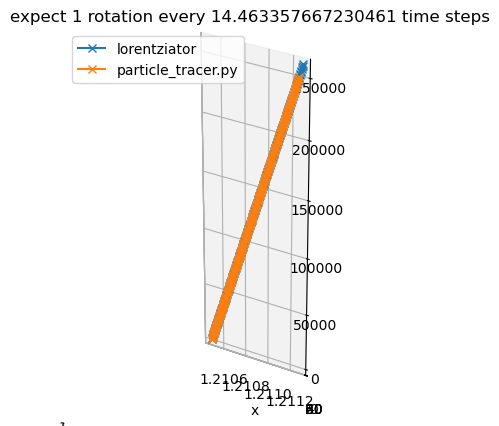

0.007231678833615231

In [28]:
omega_e = (1.60217663e-19 / 9.1093837e-31 ) * np.linalg.norm(vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:]))
t_e = 2 * np.pi / omega_e  # gyroperiod

i = 5; j = 4    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
yoffset = 0  # 1e4/R_E

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
inds = range(0,200,1)
ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
ax.plot(x[i,j,inds,0], x[i,j,inds,1], x[i,j,inds,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
ax.set_aspect('equal')
ax.set_xlabel('x')
plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
plt.legend()
plt.show()
t_e

In [29]:
xl[4,4,inds,:] - x[4,4,inds,:]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.69967211e+01,  1.68252014e-02, -6.58401551e-03],
       [ 3.39945933e+01,  3.27359048e-02, -2.49074063e-02],
       [ 5.09939169e+01,  4.83389416e-02, -5.49698088e-02],
       [ 6.79946676e+01,  6.43008832e-02, -9.67709168e-02],
       [ 8.49965569e+01,  8.12127197e-02, -1.50310450e-01],
       [ 1.01999033e+02,  9.94734145e-02, -2.15588161e-01],
       [ 1.19001463e+02,  1.19207432e-01, -2.92603836e-01],
       [ 1.36003191e+02,  1.40240741e-01, -3.81357240e-01],
       [ 1.53003716e+02,  1.62134482e-01, -4.81848149e-01],
       [ 1.70002789e+02,  1.84276230e-01, -5.94076287e-01],
       [ 1.87000451e+02,  2.05994832e-01, -7.18041346e-01],
       [ 2.03997021e+02,  2.26715326e-01, -8.53742971e-01],
       [ 2.20993059e+02,  2.46061006e-01, -1.00118078e+00],
       [ 2.37989216e+02,  2.63935991e-01, -1.16035437e+00],
       [ 2.54986136e+02,  2.80542599e-01, -1.33126336e+00],
       [ 2.71984287e+02,  2.96342683e-01

In [30]:
# Lorentz factor
gamma = 1 / np.sqrt(1- (np.linalg.norm(vl, axis =-1) / 3e8)**2)
np.nanmax(gamma)

1.0012013166317377

In [31]:
#xtest = np.array([-19, 0,0]) * R_E
xtest =  x[i,j,0,:]      # i.c. @ i=4, j=4:  vpar=vperp=0
vg_v = vlsv.read_interpolated_variable('proton/vg_v', xtest)
print(vg_v)
print(vl[i, j, 0, :])
print('diff. btw e- init. vel. and proton vel.:', vg_v - vl[i, j, 0, :])   # initial delta_v wrt proton bulk flow


[-7.59346420e+05 -7.80489435e+02  2.15059894e+01]
[-7.59070132e+05 -7.60737892e+02 -2.49997848e+06]
diff. btw e- init. vel. and proton vel.: [-2.76287308e+02 -1.97515435e+01  2.49999998e+06]


In [32]:
# Does the electron drift motion for vpar=vper=0 electron match the ExB drift?
#xtest = np.array([15, 0,0]) * R_E


# Do either of these methods account for the different grid centerings of E and B?
# method 1: my fsgrid interpolation
from carrington_beta_star import interpolator_list_3d
interpolators = interpolator_list_3d(vlsv, vlsv.read_variable('fg_e'), bounds_error = False, fill_value = np.nan)
E = np.array([interpolators[0](xtest)[0], interpolators[1](xtest)[0], interpolators[2](xtest)[0]])
interpolators_B = interpolator_list_3d(vlsv, vlsv.read_variable('fg_b'), bounds_error = False, fill_value = np.nan)
B = np.array([interpolators_B[0](xtest)[0], interpolators_B[1](xtest)[0], interpolators_B[2](xtest)[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2)

'''
# method 2: analysator's fsgrid interpolation
E = np.array([vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='z')[0]])
B = np.array([vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='z')[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2) 
'''

nv = 8

v_ExB = np.cross(E, B) / (np.linalg.norm(B))**2
B_hat = B / np.linalg.norm(B)
E_hat = E / np.linalg.norm(E)
vpar_i = np.outer(np.dot(np.array(dct['v_i']), B_hat), B_hat).reshape(nv,nv,3)  # initial parallel velocity, [npar, nper, 3] array
v_ExB, vpar_i[5,4, :]
print(t_0)
print(B)
print(E)


Did not find FsGrid decomposition from vlsv file.
Calculating fsGrid decomposition from the file


In [ ]:
print(v_ExB, vg_v)
'''
dx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py 
dxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator
dx_ExB = v_ExB * nt * dt
print(dx)
print(dxl)
print(dx_ExB)
'''

[-7.59328902e+05 -7.84108659e+02 -9.66716936e+01] [-7.59346420e+05 -7.80489435e+02  2.15059894e+01]


'\ndx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py \ndxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator\ndx_ExB = v_ExB * nt * dt\nprint(dx)\nprint(dxl)\nprint(dx_ExB)\n'

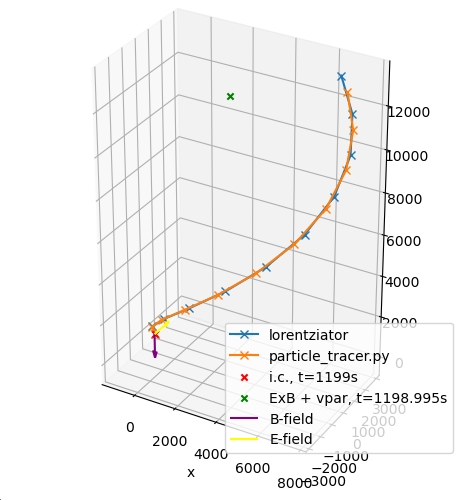

In [ ]:
fig = plt.figure()
i=5; j = 5    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
ax = fig.add_subplot(111, projection = '3d')
nt_plot = 10
inds = range(0,nt_plot+1,1)
ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
ax.plot(x[i,j,inds,0], x[i,j,inds,1], x[i,j,inds,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
dx_ExB_plot = v_ExB * nt_plot * dt
dx_vpar_i_plot = vpar_i[i, j, :] * nt_plot * dt
dx_plot = dx_ExB_plot + dx_vpar_i_plot
x_f = x[i,j,inds[0],:] + dx_plot
ax.scatter( x[i,j,0,0], x[i,j,0,1], x[i,j,0,2], marker = 'x', label = 'i.c., t=1199s', color = 'red')  # particle_tracer.py
ax.scatter( x_f[0], x_f[1], x_f[2], marker = 'x', label = 'ExB + vpar, t={}s'.format(t_0+nt_plot*dt), color = 'green')  # particle_tracer.py
ax.set_aspect('equal')
#ax.scatter(*points.T[0], color = 'red')
ax.set_xlabel('x')
#plt.title(r'i.c. {}, t= {}, $x = [11.5, 0, 0] R_E$, $v_\parallel=v_\perp = 0$ '.format(run, t_0))
#plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
quiv_len = np.linalg.norm(x_f)/1e6*nt_plot
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          B_hat[0], B_hat[1], B_hat[2], length=quiv_len, normalize=True, color ='purple', label = 'B-field')
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          E_hat[0], E_hat[1], E_hat[2], length=quiv_len, normalize=True, color ='yellow', label = 'E-field')
plt.legend()
plt.tight_layout()
plt.show()

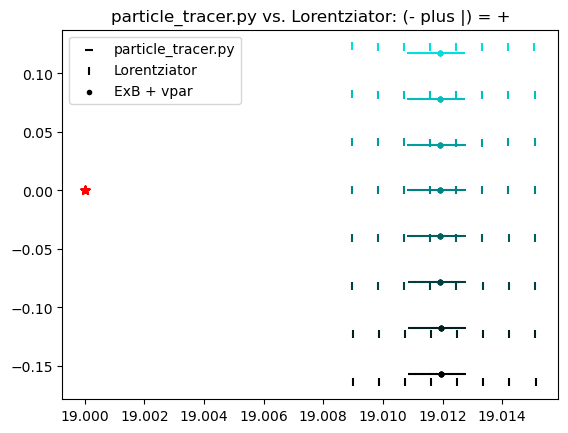

In [ ]:


for i in range(nv):
    for j in range(nv):
        dx_ExB_plot = v_ExB * (end_ti - start_ti) * dt
        dx_vpar_i_plot = vpar_i[i, j, :] * (end_ti - start_ti) * dt
        dx_plot = dx_ExB_plot + dx_vpar_i_plot
        x_f = x[i,j,inds[0],:] + dx_plot

        plt.scatter(x[i,j,start_ti,0]/R_E, x[i,j,start_ti,2]/R_E, color = "red", marker = '*')  # x-z
        if (i+j) == 0:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_", label = 'particle_tracer.py')  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|", label = 'Lorentziator')  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".", label = 'ExB + vpar')  # x-z
        else:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_")  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|")  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".")  # x-z
        plt.legend()
        plt.title('particle_tracer.py vs. Lorentziator: (- plus |) = +')
        #plt.plot(x[i,j,:,0]/R_E, x[i,j,:,2]/R_E, color = (0, i/nv, j/nv))  # x-z

In [ ]:
dct.keys()
vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:])

array([ 5.45934157e-13,  3.90283663e-14, -4.93991343e-09])

In [ ]:
np.linalg.norm(vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:]))

4.939913460486052e-09

In [ ]:
dct['t'][1][1]

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235,
       0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275,
       0.028 , 0.0285, 0.029 , 0.0295, 0.03  , 0.0305, 0.031 , 0.0315,
       0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355,
       0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395,
       0.04  , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435,
       0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475,
       0.048 , 0.0485, 0.049 , 0.0495, 0.05  , 0.0505, 0.051 , 0.0515,
       0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555,
      

In [ ]:
B_hat = B / np.linalg.norm(B)
np.dot(dct['v_i'][3][3], B_hat)


-2500108.7393684452

In [ ]:
v_par_i = np.outer(np.dot(np.array(dct['v_i']), B_hat), B_hat).reshape(8,8,3)  # initial parallel velocity, [npar, nper, 3] array
v_par_i[7,7:]


array([[ 9.54789520e+02,  3.09335508e+01, -7.49985344e+06]])

In [ ]:
x[i,j,inds,0]/R_E, x[i,j,inds,1]/R_E, x[i,j,inds,2]/R_E

(array([19.        , 19.00018537, 19.00059906, 19.00117527, 19.00181804,
        19.00241902, 19.00287765, 19.00311978, 19.00311151, 19.00286541,
        19.00243827]),
 array([ 0.        , -0.00057021, -0.00103449, -0.00130659, -0.00133596,
        -0.00111713, -0.00069074, -0.00013598,  0.00044412,  0.00094182,
         0.00126469]),
 array([0.        , 0.00058861, 0.00117726, 0.00176593, 0.0023546 ,
        0.00294328, 0.00353193, 0.00412056, 0.00470916, 0.00529773,
        0.00588628]))

In [ ]:
dct['t'][0][0]

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235,
       0.024 , 0.0245, 0.025 , 0.0255, 0.026 , 0.0265, 0.027 , 0.0275,
       0.028 , 0.0285, 0.029 , 0.0295, 0.03  , 0.0305, 0.031 , 0.0315,
       0.032 , 0.0325, 0.033 , 0.0335, 0.034 , 0.0345, 0.035 , 0.0355,
       0.036 , 0.0365, 0.037 , 0.0375, 0.038 , 0.0385, 0.039 , 0.0395,
       0.04  , 0.0405, 0.041 , 0.0415, 0.042 , 0.0425, 0.043 , 0.0435,
       0.044 , 0.0445, 0.045 , 0.0455, 0.046 , 0.0465, 0.047 , 0.0475,
       0.048 , 0.0485, 0.049 , 0.0495, 0.05  , 0.0505, 0.051 , 0.0515,
       0.052 , 0.0525, 0.053 , 0.0535, 0.054 , 0.0545, 0.055 , 0.0555,
      

In [ ]:
dct['vpar'][7][7]

7500000.0

In [ ]:
dx_ExB_plot

array([7.59328902e+04, 7.84108659e+01, 9.66716936e+00])

In [ ]:
nt_plot

10

In [ ]:
dt

-0.0005